# Project: Investigate a Dataset on TMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Answer: The dataset from IMDB contains information over 10,000 movies, short films and tv series collected from The Movie Database (TMDb), including user ratings, revenue, runtime and budget.
There are few questions that I would like to dig in as below:
1. What is the relationship between runtime and vote average?
2. Which genres are most popular from year to year?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# to access the data in csv file to analyse the general properties of the data
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


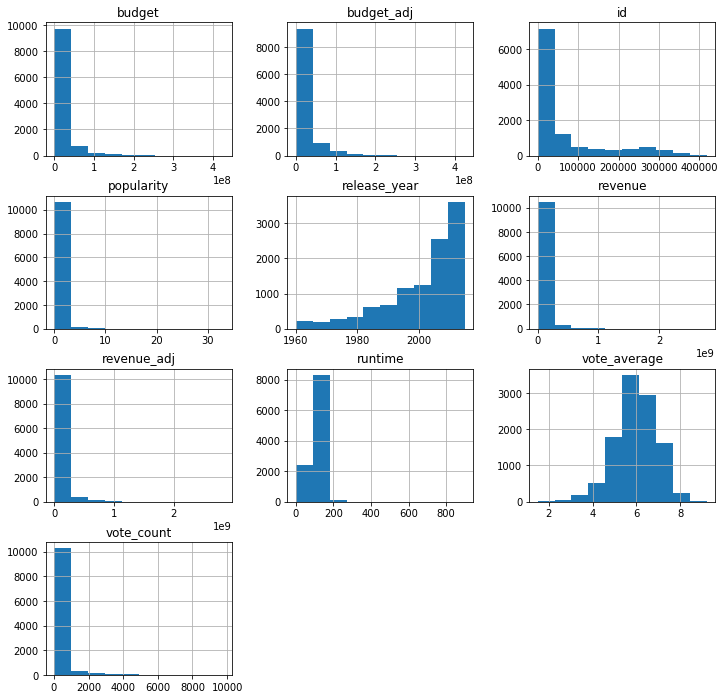

In [6]:
df.hist(figsize=(12,12));

### Data Cleaning
Problems of dataset:
1. Colunmns like cast are separated by '|' in between.
2. Too many columns exists as some are not useful for the analysis
3. Columns like revenue contains '0' values, which should be changed to 'NaN' and dropped.


In [7]:
# To change zero values to NaN and drop them
df_zero = ['revenue_adj','revenue','budget_adj','budget','runtime']
df[df_zero].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [8]:
#To check duplicates
df.duplicated().sum()

0

In [9]:
# To drop unnecessary colunmns
df = df.drop(['cast', 'keywords', 'director', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline'], axis=1)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: What is the relationship between runtime and vote average?


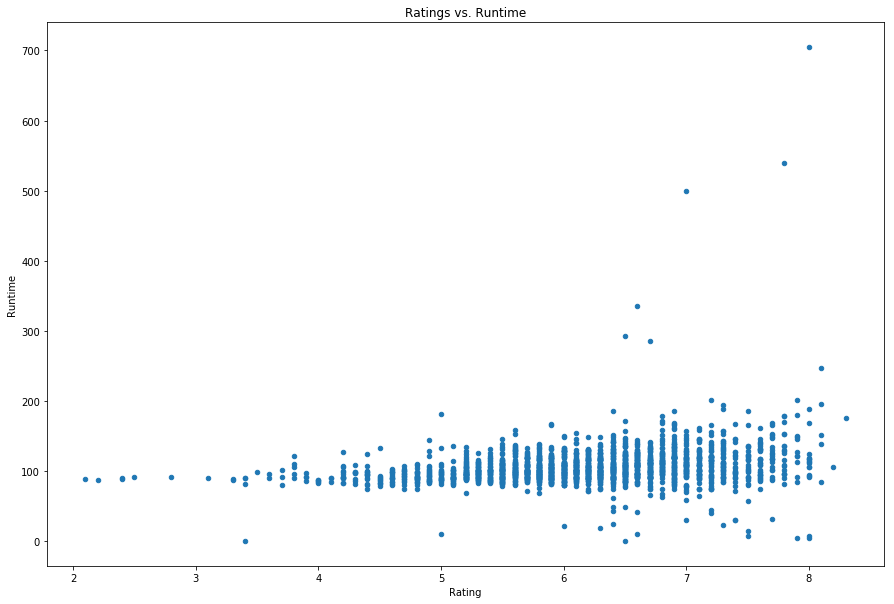

In [10]:
# Plot scatter plot of these two columns
df.plot(x='vote_average', y='runtime', kind='scatter', figsize=(15,10))
plt.title('Ratings vs. Runtime')
plt.xlabel('Rating')
plt.ylabel('Runtime');

### Research Question 2: Which genres are most popular from year to year?

In [11]:
# To prepare dataframe for question 2 by making a copy of original df
popular_genre = df.copy()
popular_genre.drop(['original_title','budget','revenue','runtime', 'production_companies', 'vote_count', 'vote_average','budget_adj', 'revenue_adj'], axis=1, inplace=True)

# To index and locate the id and genres column
genre = popular_genre.loc[:, ['id', 'genres']]
genre.head(1)

,id,genres
0,135397,Action|Adventure|Science Fiction|Thriller


In [12]:
# To split the genre colunmn splitted by '|' and add to a list
genre_list = genre['genres'].str.split('|').tolist()
genre_list[:5]

[['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Fantasy'],
 ['Action', 'Crime', 'Thriller']]

In [13]:
# To check that each element is a list by iterating a loop
for i in range(len(genre_list)):
    if not isinstance(genre_list[i], list):
        genre_list[i] = [genre_list[i]]

In [14]:
# To creats a new dataframe using genre_list and the id column of the 'genre' dataframe as the index. As this will result in 
# multiple columns with an individual genre value per id, we need to apply .stack() to pivot the data: 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html
stack_genre = pd.DataFrame(genre_list, index=genre['id']).stack()
stack_genre = stack_genre.reset_index()
stack_genre = stack_genre.loc[:, ['id', 0]]
stack_genre.columns = ['id', 'genre']

In [15]:
print(stack_genre.head())

       id            genre
0  135397           Action
1  135397        Adventure
2  135397  Science Fiction
3  135397         Thriller
4   76341           Action


In [16]:
# To merge stacked_genre and movie_genres and drop columns we don't need
merge_df = pd.merge(popular_genre, stack_genre, on='id', how='left')
merge_df.drop(['genres', 'id'], axis=1, inplace=True)

In [17]:
# To preview the new df
merge_df.head(2)

,popularity,release_year,genre
0,32.985763,2015,Action
1,32.985763,2015,Adventure


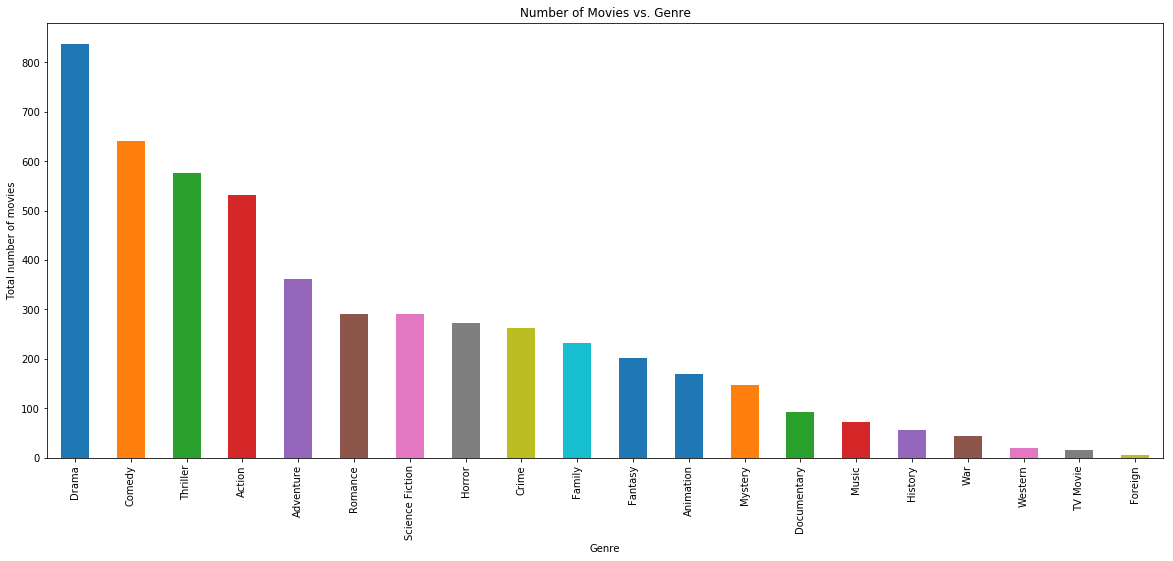

In [18]:
# To plot the bar chart of all genres ranked descending by popularity on avera
merge_df['genre'].value_counts().plot(kind='bar', figsize=(20, 8));
plt.title('Number of Movies vs. Genre')
plt.xlabel('Genre')
plt.ylabel('Total number of movies');

Based on the bar chart above, we can see the total number of movies made for each genre over the year, descending.

In order to analyse the relationship between popularity and genre over the year, group the genre types by release year and calculate the mean popularity for each group.


In [19]:
# To use groupby function to calculate mean popularity of each genre in each year and unstack it
genre_df = merge_df.groupby(['release_year','genre']).mean().unstack().reset_index()
genre_df.head()

release_year popularity                                                  \
genre                  Action Adventure Animation    Comedy Crime Documentary   
0             1961        NaN       NaN       NaN  0.303783   NaN         NaN   
1             1962   3.170651  3.170651       NaN       NaN   NaN         NaN   
2             1963   2.508235  2.508235       NaN       NaN   NaN         NaN   
3             1964   3.153791  3.153791       NaN  0.812194   NaN         NaN   
4             1965   1.910465  1.910465       NaN       NaN   NaN         NaN   

                                ...                                     \
genre Drama    Family Fantasy   ...   History Horror     Music Mystery   
0       NaN  0.303783     NaN   ...       NaN    NaN       NaN     NaN   
1       NaN       NaN     NaN   ...       NaN    NaN       NaN     NaN   
2       NaN       NaN     NaN   ...       NaN    NaN       NaN     NaN   
3       NaN       NaN     NaN   ...       NaN    NaN  0.812194     NaN   
4       NaN       NaN     NaN   ...       NaN    NaN       NaN     NaN   

                                                              
genre Romance Science Fiction TV Movie  Thriller War Western  
0         NaN             NaN      NaN       NaN NaN     NaN  
1         NaN             NaN      NaN  3.170651 NaN     NaN  
2         NaN             NaN      NaN  2.508235 NaN     NaN  
3         NaN             NaN      NaN  3.153791 NaN     NaN  
4         NaN             NaN      NaN  1.910465 NaN     NaN  

[5 rows x 21 columns]

ValueError: Illegal format string "popularity.Action"; two marker symbols

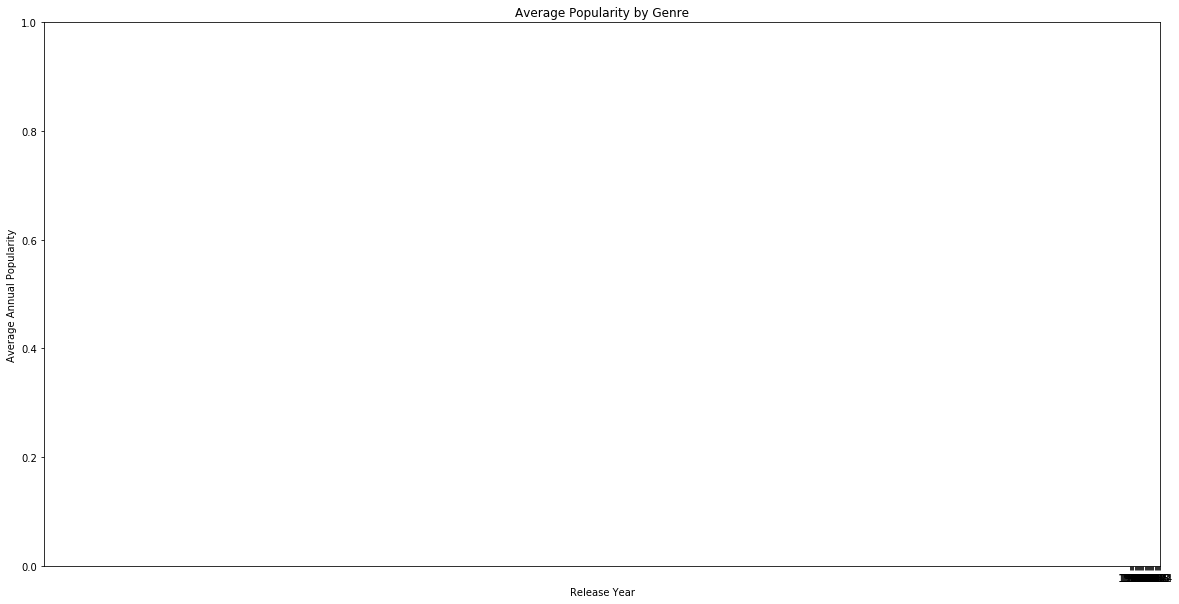

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.title('Average Popularity by Genre')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity.Action', genre_df)
ax.legend(loc='upper left');

In [ ]:
# compare close line graphs
genre_df.loc[:, ['Fantasy', 'Aadventure']]

Fantasy and Adventure are obviously the most popular within these 6 genres. Drama and Comedy are in quite similar stable trends. History and Horror more like the new genres around 2000 and History has a peak in 2014.

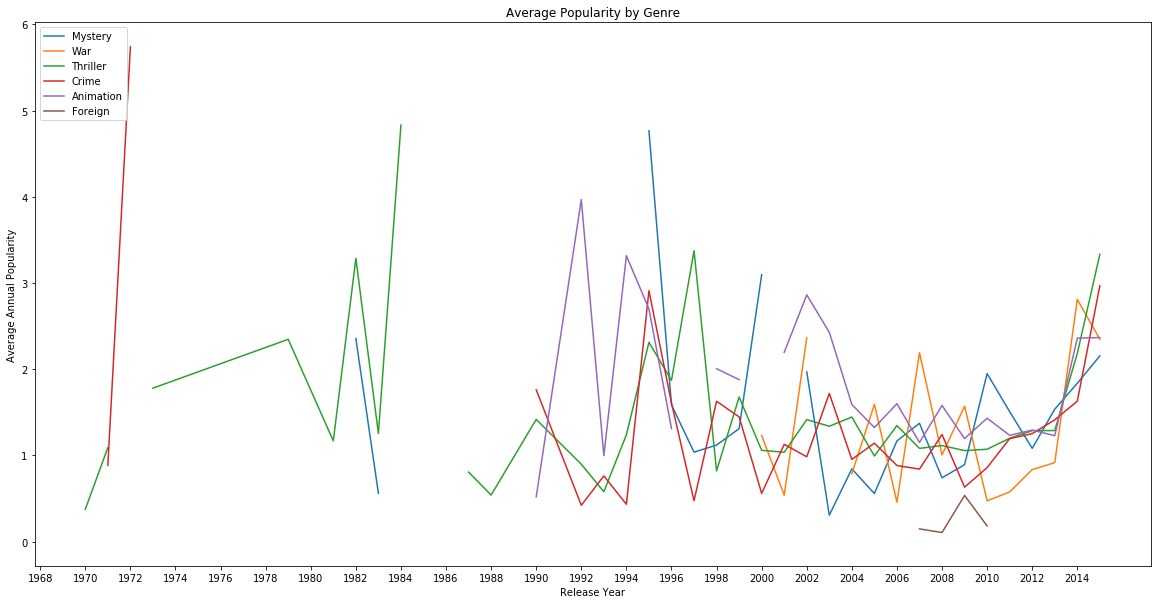

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.title('Average Popularity by Genre')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_mystery', data=genre_merge, label="Mystery")
ax.plot('release_year', 'popularity_war', data=genre_merge, label="War")
ax.plot('release_year', 'popularity_thriller', data=genre_merge, label="Thriller")
ax.plot('release_year', 'popularity_crime', data=genre_merge, label="Crime")
ax.plot('release_year', 'popularity_animation', data=genre_merge, label="Animation")
ax.plot('release_year', 'popularity_foreign', data=genre_merge, label="Foreign")
ax.legend(loc='upper left');

In [28]:
# compare close line graphs
genre_merge.loc[:, ['popularity_animation','popularity_thriller', 'popularity_mystery']].mean()

popularity_animation    1.759560
popularity_thriller     1.539862
popularity_mystery      1.476491
dtype: float64

There are many missing points which make the analysis difficult as before 1994, only Crime and Thriller have some data and these 2 have similar trends over the year.
Thus, we focus on the comparison after that for all genres. 
Animation and Mystery are more popular in this group.

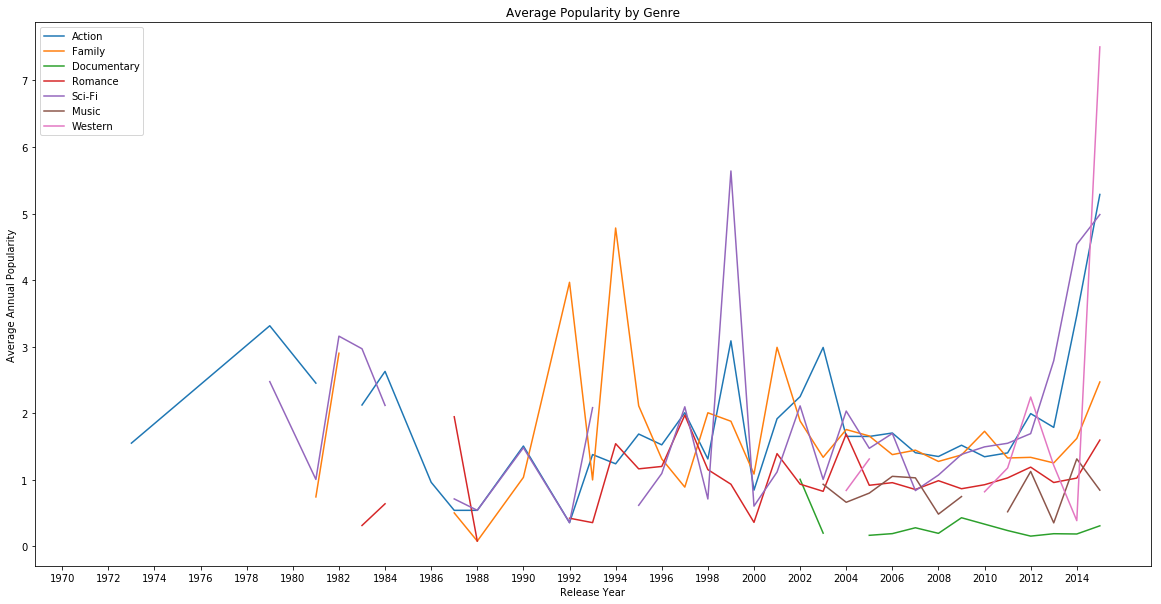

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.title('Average Popularity by Genre')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_action', data=genre_merge, label="Action")
ax.plot('release_year', 'popularity_family', data=genre_merge, label="Family")
ax.plot('release_year', 'popularity_documentary', data=genre_merge, label="Documentary")
ax.plot('release_year', 'popularity_romance', data=genre_merge, label="Romance")
ax.plot('release_year', 'popularity_science fiction', data=genre_merge, label="Sci-Fi")
ax.plot('release_year', 'popularity_music', data=genre_merge, label="Music")
ax.plot('release_year', 'popularity_western', data=genre_merge, label="Western")
ax.legend(loc='upper left');

In [30]:
# compare close line graphs
genre_merge.loc[:, ['popularity_action', 'popularity_family','popularity_science fiction']].mean()

popularity_action             1.825407
popularity_family             1.719198
popularity_science fiction    1.830829
dtype: float64

Again missing data makes the analysis diffcult espcially for all genres before 2000.
Over the years, Action, Family and Science Fiction are all quite popular while the rest fluctuates a lot.

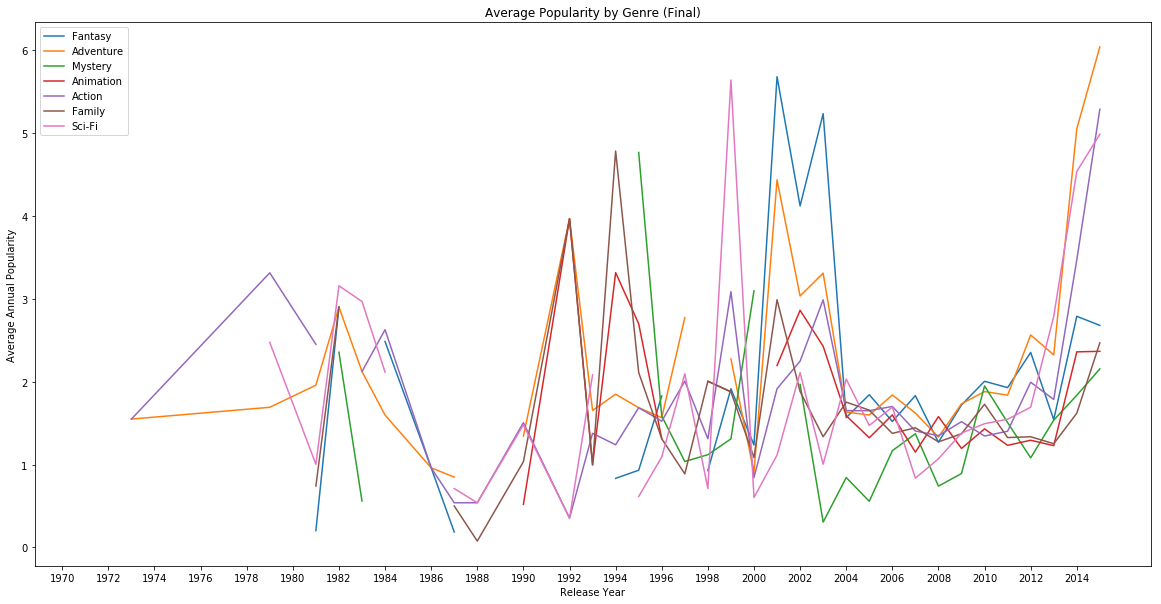

In [31]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.title('Average Popularity by Genre (Final)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_fantasy', data=genre_merge, label="Fantasy")
ax.plot('release_year', 'popularity_adventure', data=genre_merge, label="Adventure")
ax.plot('release_year', 'popularity_mystery', data=genre_merge, label="Mystery")
ax.plot('release_year', 'popularity_animation', data=genre_merge, label="Animation")
ax.plot('release_year', 'popularity_action', data=genre_merge, label="Action")
ax.plot('release_year', 'popularity_family', data=genre_merge, label="Family")
ax.plot('release_year', 'popularity_science fiction', data=genre_merge, label="Sci-Fi")
ax.legend(loc='upper left');

In [32]:
genre_merge.loc[:, ['popularity_animation', 'popularity_action', 'popularity_science fiction', 'popularity_fantasy', 'popularity_adventure','popularity_mystery']].mean()

popularity_animation          1.759560
popularity_action             1.825407
popularity_science fiction    1.830829
popularity_fantasy            2.024009
popularity_adventure          2.231204
popularity_mystery            1.476491
dtype: float64

<a id='conclusions'></a>

### Conclusion:
Question 1: 
In general, shorter films are more likely to have a mid-to-high rating. The ratings for films with a runtime around 100 minutes are unpredictable, as they run from low to high. Films/shows with a runtime above or below 100 minues tend to have mid-to-high ratings. TV series (or movies with long runtimes) generally much better ratings.
Question 2:
From the graph, we can tell that the popularity of each genre varies a lot over the year. The top 5 genres would be Adventure, Animation, Fantasy, Science Fiction and Action,

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0